In [8]:
%matplotlib inline

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('../test_predictions.csv')
df.head()

,id_code,0,1,2,3,4,diagnosis,target
0,000c1434d8d7,2.876925,2.899105,2.882262,2.891883,2.887816,3,2
1,001639a390f0,3.827429,3.824548,3.833500,3.834618,3.835265,4,4
2,0024cdab0c1e,0.886559,0.864979,0.820034,0.855378,0.851468,1,1
3,002c21358ce6,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
4,005b95c28852,0.000000,0.000000,0.000000,0.000000,0.000000,0,0


In [13]:
df['avg'] = df[['0', '1', '2', '3', '4']].mean(axis=1)

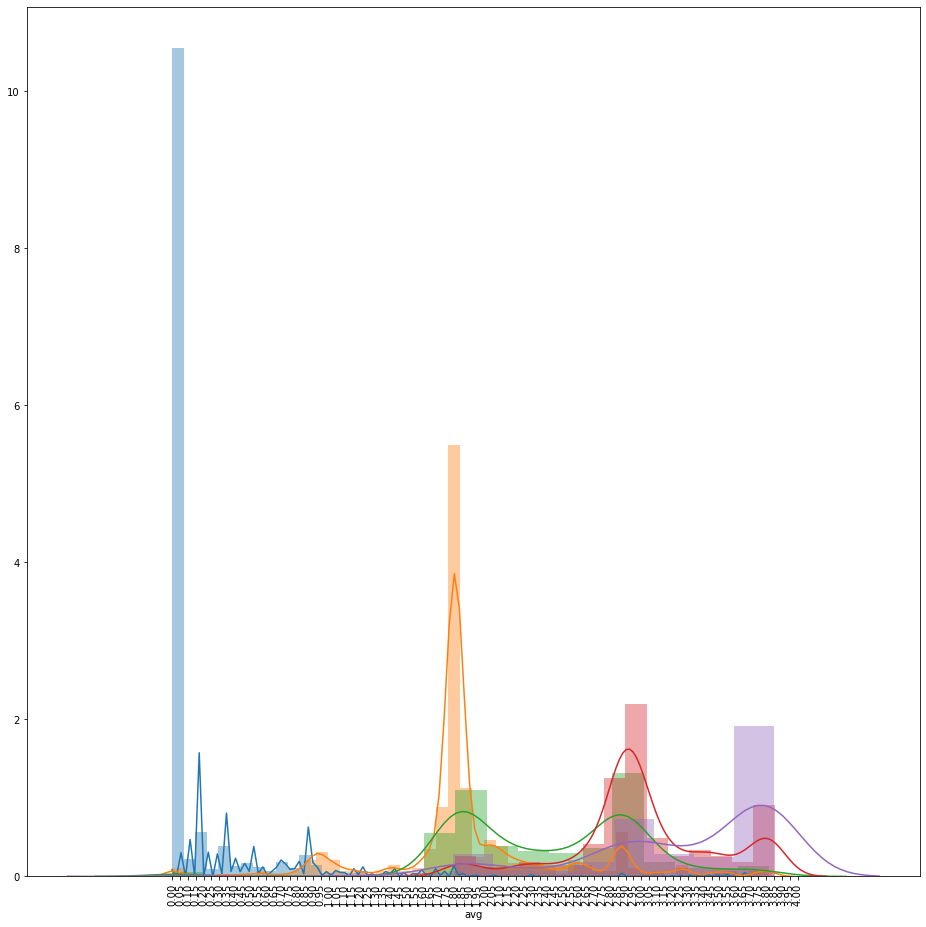

In [83]:
fig, ax = plt.subplots(figsize=(16, 16))

for c in range(5):
    sns.distplot(df.loc[df['target'] == c, 'avg'], kde=True, ax=ax)

plt.xticks(np.arange(0, 4.05, 0.05), rotation=90)
plt.savefig('pred_plot.png', dpi=300)

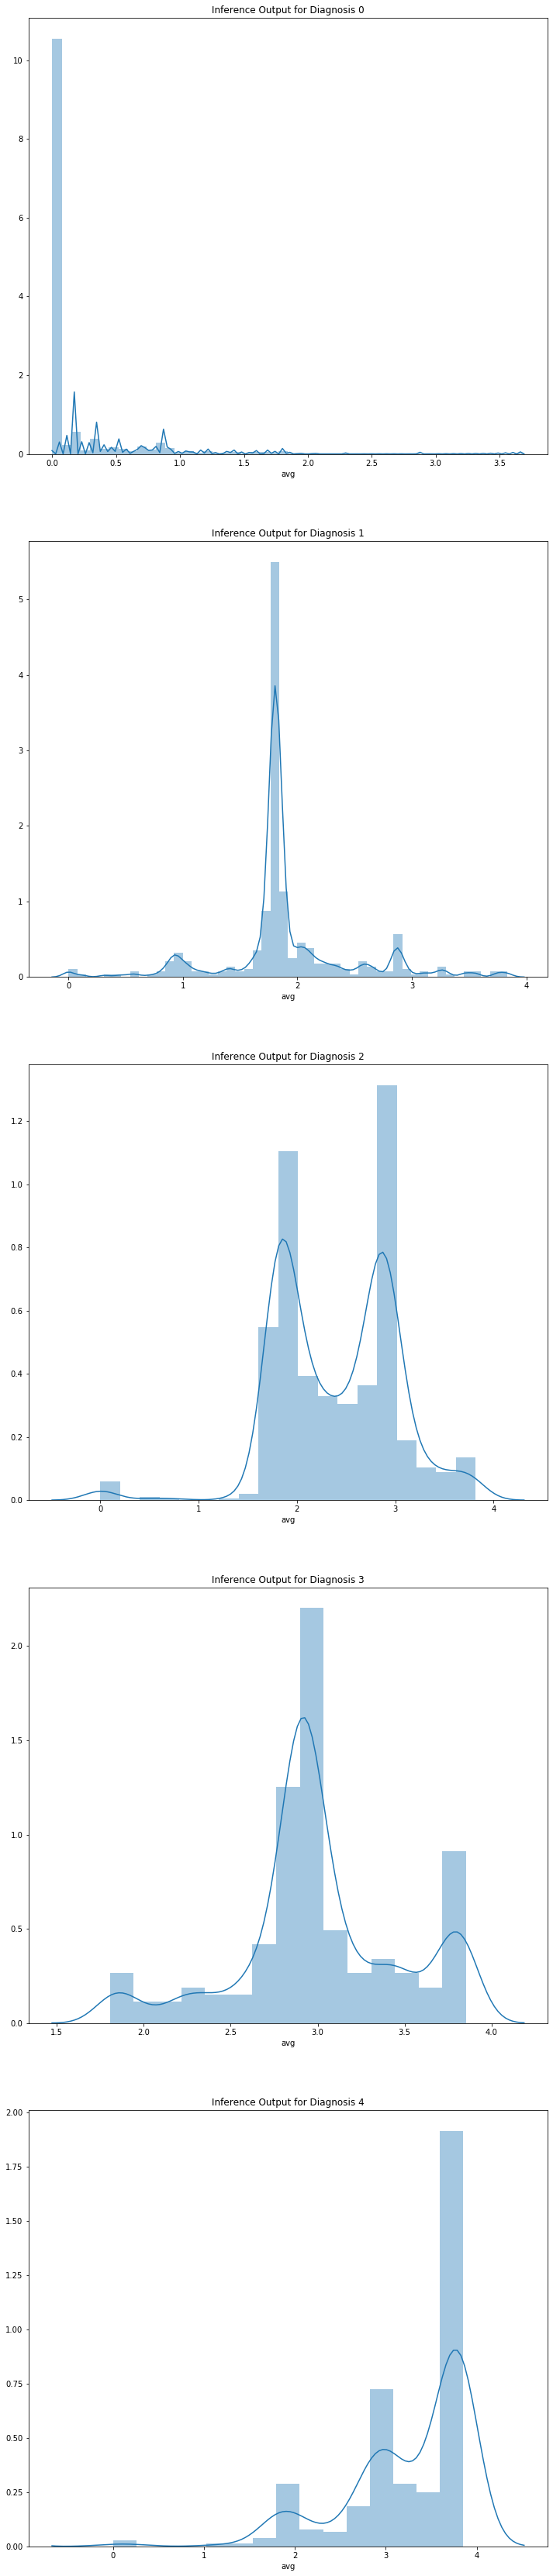

In [20]:
fig, axs = plt.subplots(5, figsize=(12, 60))

for c in range(5):
    sns.distplot(df.loc[df['target'] == c, 'avg'], kde=True, ax=axs[c])
    axs[c].set_title(f'Inference Output for Diagnosis {c}')

In [84]:
def recalibrate(pred):
    if pred < 0.9:
        return 0
    if pred < 1.85:
        return 1
    if pred < 2.7:
        return 2
    if pred < 3.25:
        return 3
    return 4

In [85]:
df['recalibrate'] = df['avg'].apply(recalibrate)

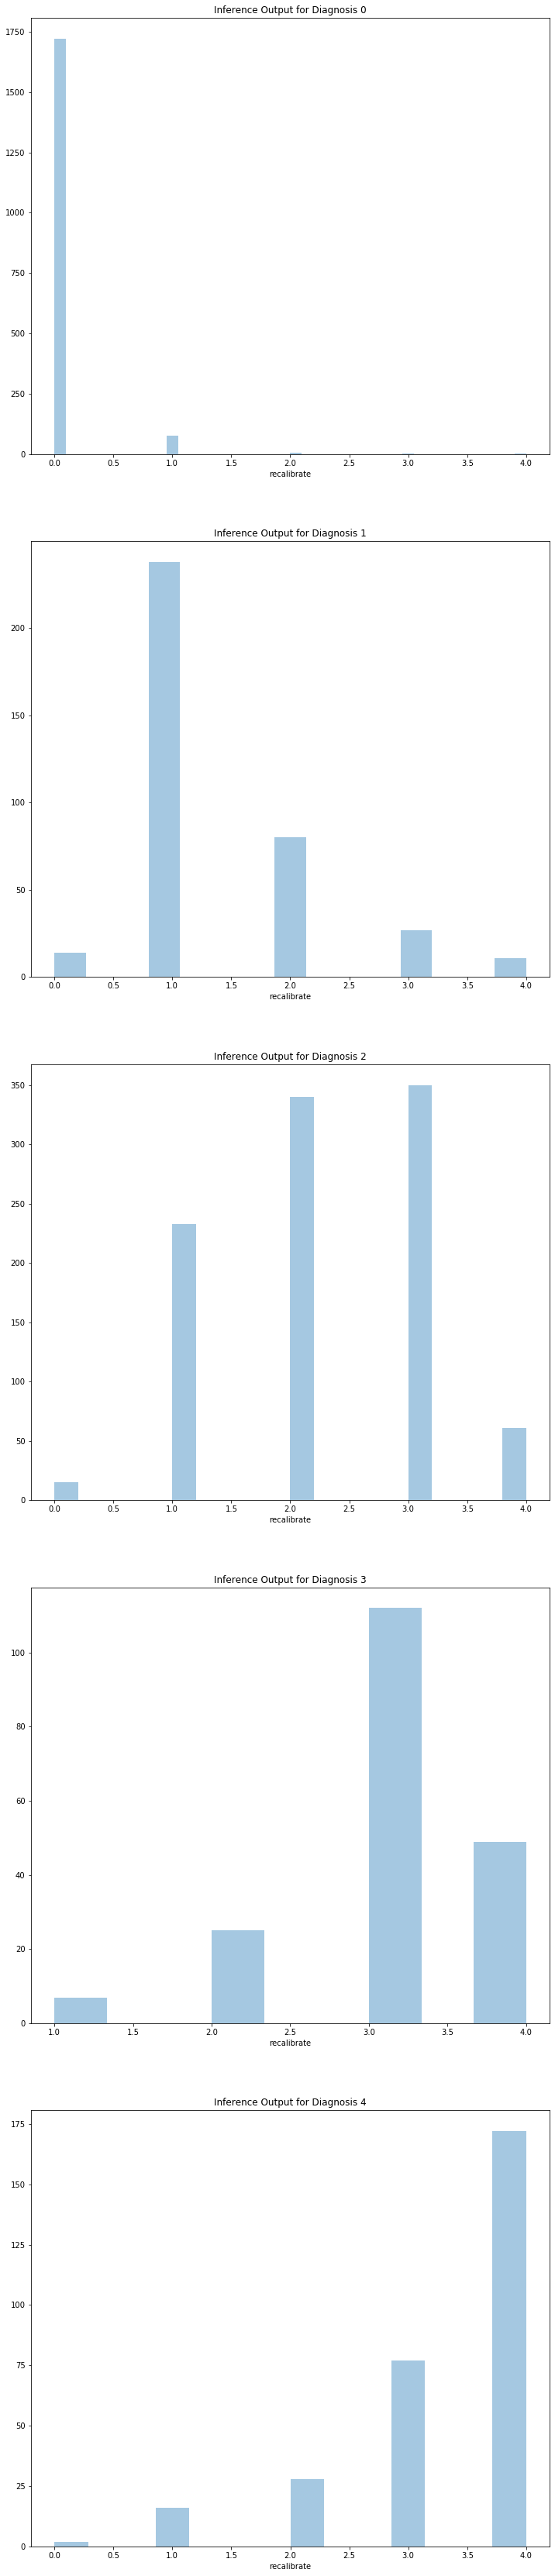

In [86]:
fig, axs = plt.subplots(5, figsize=(12, 60))

for c in range(5):
    sns.distplot(df.loc[df['target'] == c, 'recalibrate'], kde=False, ax=axs[c])
    axs[c].set_title(f'Inference Output for Diagnosis {c}')